# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import requests as rq

import statsmodels.formula.api as snf # será adicionado a minha coleção de estatística
from sklearn.metrics import r2_score

tips = sns.load_dataset("tips")
tips["tip_pct"] = tips["tip"]/ (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [2]:
reg = snf.ols("tip ~ net_bill", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        20:05:35   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

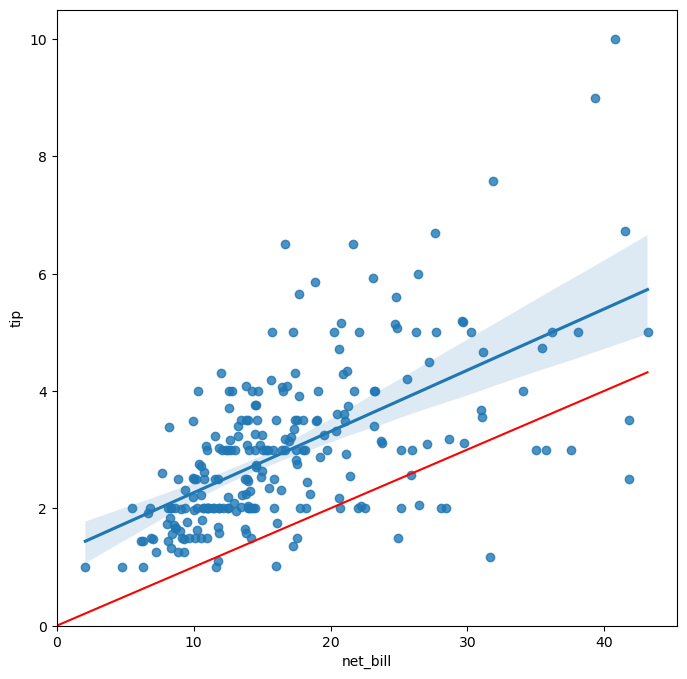

In [3]:
# Gráfico de dispersão
plt.figure(figsize=(8, 8))
sns.regplot(y = "tip", x = "net_bill", data = tips[tips["tip_pct"]<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0, tips["net_bill"].max(), 100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, "-r", label = "linha dos 10%")

# Opções estéticas para explicar o (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [4]:
reg_pct = snf.ols("tip_pct ~ net_bill", data = tips).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        20:05:36   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

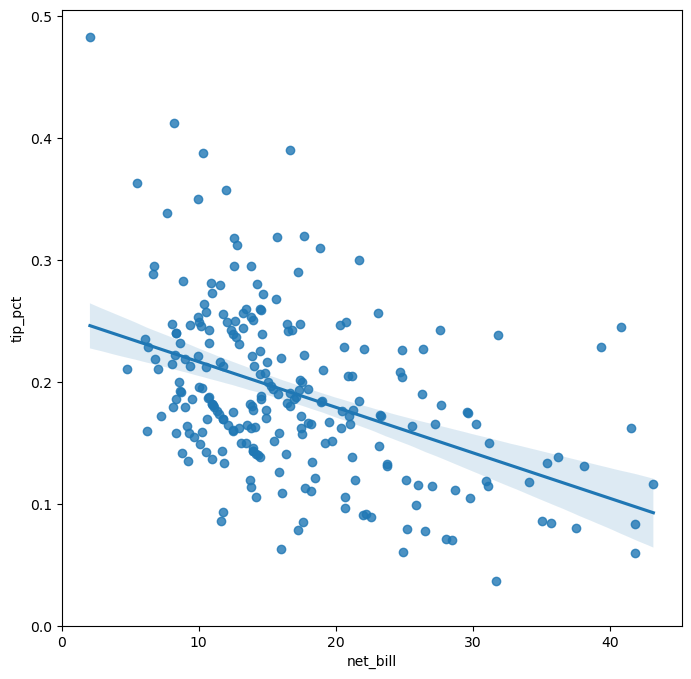

In [5]:
# Gráfico de dispersão
plt.figure(figsize=(8, 8))
sns.regplot(y = "tip_pct", x = "net_bill", data = tips[tips["tip_pct"] < .5])

# Opções estéticas para explicar o (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os dois gráficos possuem carater comportamental oposto, ou seja, o 1º demonstra uma relação direta e o 2º apresenta relação inversa. O que indica que a gorjeta, na verdade, não é governada pelo tamanho da conta, uma vez que ao aumentar o valor da conta, o percentual de gorjeta diminui; apesar da gorjeta total aumentar.

Podemos comparar, mas como ambos não apresentam significância mínima estatisticamente falando (>70%) nos ajustes R² (apesar do modelo linear do Tip X Net_bill ajustar um pouco melhor), seria uma inferência meramente superficial devido a não significância. Os pontos estão muito dispersos para que os modelos sejam avaliados perante ao R².

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1 [R-squared:	0.333]

In [10]:
# Para extrair a lista de valores preditos usando a dica
pred_tip_pct = reg.fittedvalues

# Para prever os valores convertidos de porcentagem para unidade monetárias.
pred_tip = pred_tip_pct * tips["net_bill"].values
pred_tip # mostra a lista de valores arrecadadores, segundo a previsão

0      46.630446
1      19.034500
2      53.756242
3      68.323532
4      71.640801
         ...    
239    83.803782
240    96.487751
241    69.945737
242    47.036737
243    45.733339
Length: 244, dtype: float64

In [16]:
round(r2_score(tips["tip"].values, pred_tip_pct), 3)

0.333

O valor de ajuste dos modelos são identicos até a 3ª casa significativa, ou seja, é possivel o uso do modelo de previsão para os dados de gorjetas, em relação ao modelo linear empregado na modelagem preditiva.